# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# View the columns in each file
print(mouse_metadata.columns.values)
print(study_results.columns.values)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
#combined_mouse_studyresults.sort_values("Mouse ID")

# Display the data table for preview
combined_data_df


['Mouse ID' 'Drug Regimen' 'Sex' 'Age_months' 'Weight (g)']
['Mouse ID' 'Timepoint' 'Tumor Volume (mm3)' 'Metastatic Sites']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(combined_data_df['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#Find the duplicate records and return the duplicate Mouse IDs
duplicate_records = combined_data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
mouseid_duplicates = combined_data_df[duplicate_records]["Mouse ID"]
print(mouseid_duplicates)

908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dupes_df = combined_data_df[combined_data_df['Mouse ID'] != 'g989'].drop_duplicates()
no_dupes_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(no_dupes_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

groupbydrug = no_dupes_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
stats = pd.DataFrame({})
stats["Mean Tumor Volume"] = groupbydrug.mean()
stats["Median Tumor Volume"] = groupbydrug.median()
stats["Tumor Volume Variance"] = groupbydrug.var()
stats["Tumor Volume Std. Dev."] = groupbydrug.std()
stats["Tumor Volume Std. Err."] = groupbydrug.sem()
stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

#Group the data by 'Regimen' and calculate the mean, median, variance, standard deviation, and SEM
summary_stats_table = no_dupes_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std'])

#Calculate SEM   --used numpy
summary_stats_table['SEM'] = summary_stats_table['std'] / np.sqrt(no_dupes_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count())

#Rename columns
summary_stats_table.columns = ['Mean', 'Median', 'Variance', 'Std Dev', 'SEM']
summary_stats_table

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

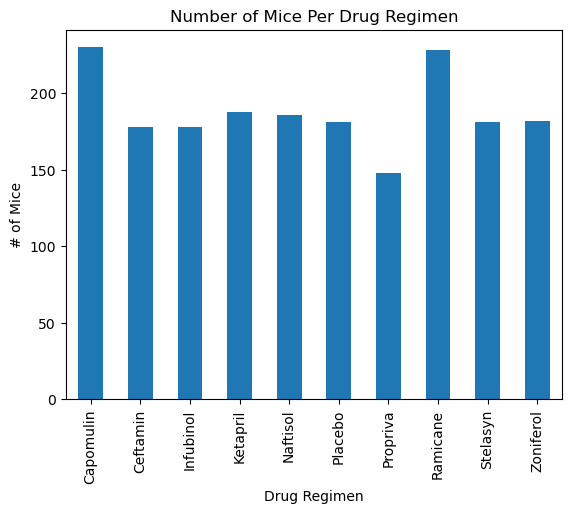

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count = no_dupes_df.groupby('Drug Regimen').size()
regimen_count.plot.bar()

plt.title('Number of Mice Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mice')

plt.show()

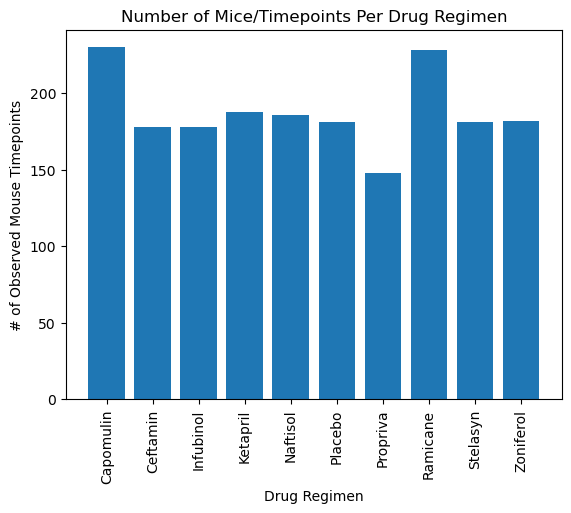

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(regimen_count.index, regimen_count.values)

plt.title('Number of Mice/Timepoints Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.xticks(rotation=90)

plt.show()

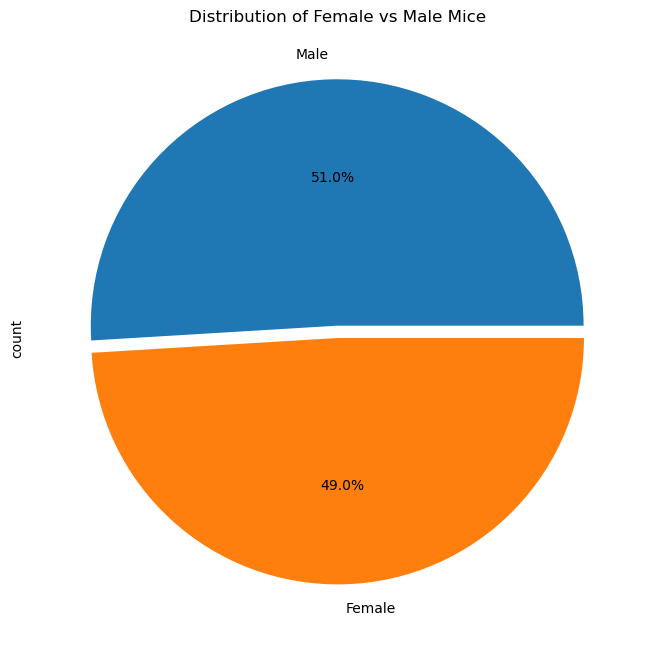

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex=no_dupes_df['Sex'].value_counts()
sex.plot.pie(autopct='%1.1f%%', figsize=(8, 8), explode=(0.05, 0))
plt.title('Distribution of Female vs Male Mice')
plt.show()

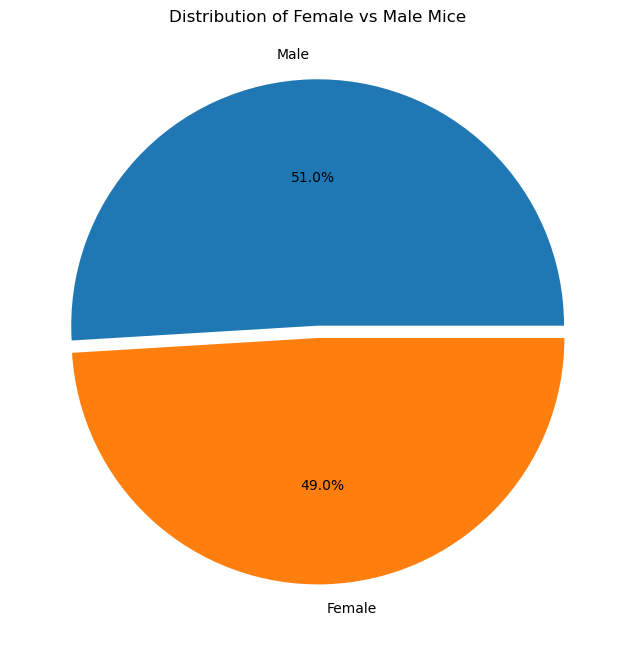

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(8, 8))
plt.pie(sex, labels=sex.index, autopct='%1.1f%%', explode=(0.05, 0))
plt.title('Distribution of Female vs Male Mice')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#only include the 4 noted regimens
study_treatment = no_dupes_df[(no_dupes_df["Drug Regimen"] == "Capomulin") |
                             (no_dupes_df["Drug Regimen"] == "Ramicane") |
                             (no_dupes_df["Drug Regimen"] == "Infubinol") |
                             (no_dupes_df["Drug Regimen"] == "Ceftamin")]
study_treatment


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = study_treatment.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint.reset_index(), study_treatment, on=["Mouse ID", "Timepoint"])
final_tumor_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatment_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = study_treatment.loc[study_treatment["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    # add subset to tumor volume data list
    tumor_volume_data.append(tumor_vol)
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    #print(f"Lower quartile: {lowerq})
    #print(f"Upper quartile: {upperq})
    
    # Calculate the IQR
    iqr = upperq- lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    
    # name the potential outliers
    potential_outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers: {potential_outliers}")

Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


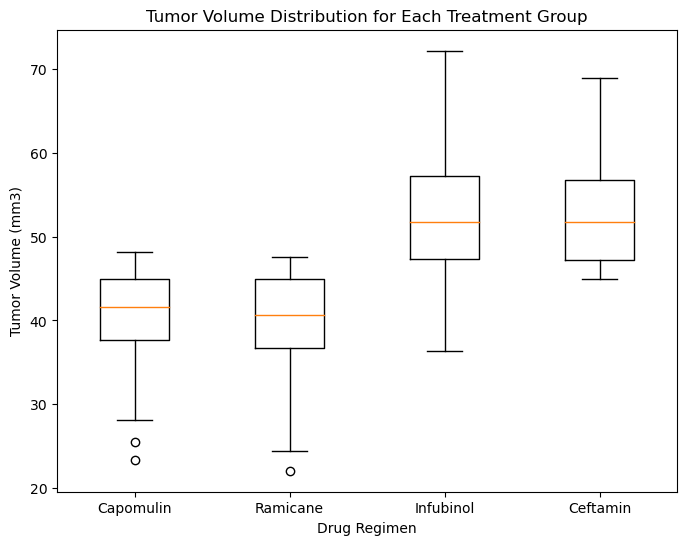

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6)) 
plt.boxplot(tumor_volume_data, labels=treatment_list) 
plt.title('Tumor Volume Distribution for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

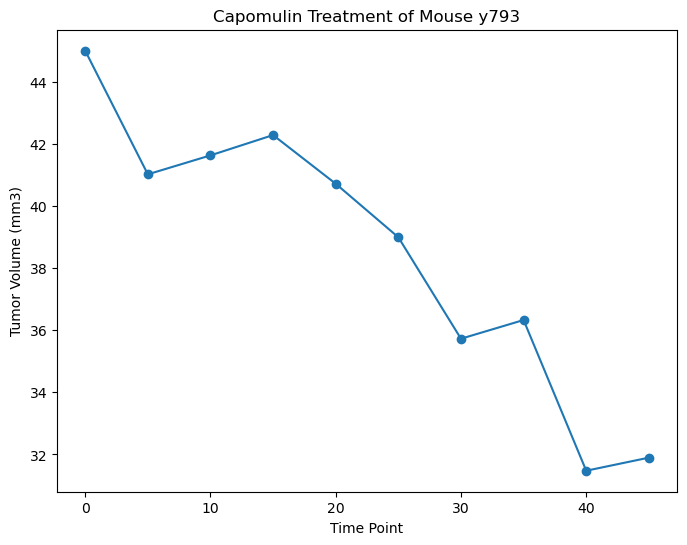

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "y793"
mouse_y793 = study_treatment[(study_treatment["Drug Regimen"] == "Capomulin") & (study_treatment["Mouse ID"] == mouse_id)]

plt.figure(figsize=(8, 6)) 
plt.plot(mouse_y793["Timepoint"], mouse_y793["Tumor Volume (mm3)"], marker='o')
plt.title(f'Capomulin Treatment of Mouse {mouse_id}')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

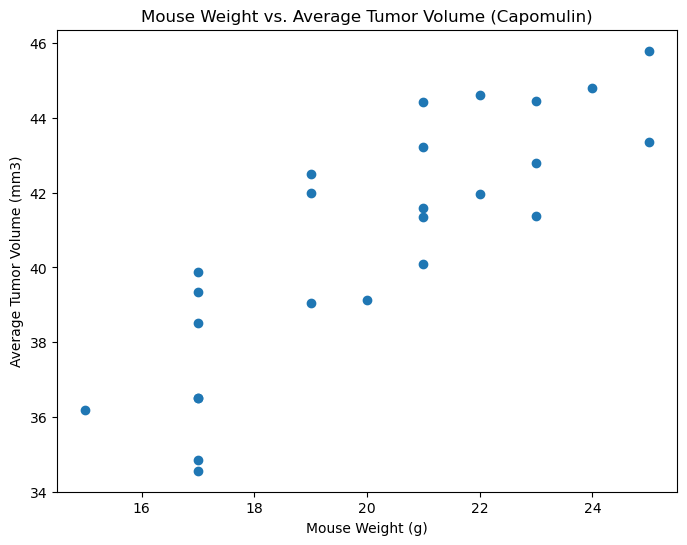

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = study_treatment[study_treatment["Drug Regimen"] == "Capomulin"]
average_data = capomulin_data.groupby("Mouse ID").agg(Average_Weight=('Weight (g)', 'mean'),Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean')
).reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(average_data['Average_Weight'], average_data['Average_Tumor_Volume'], marker='o')

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
